In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from subprocess import check_output

In [3]:
print(check_output(["ls", "."]).decode("utf8"))

data.csv
fs.ipynb



In [4]:
data = pd.read_csv('data.csv')
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

      ...       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0     ...               17.33           184.60      2019.0            0.1622   
1     ...               23.41           158.80      1956.0            0.1238   
2     ...               25.53           152.50      1709.0            0.1444   
3     ...               26.50            98.87       567.7            0.2098   
4     ...               16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [5]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
data.shape

(569, 33)

# Null values

In [7]:
total = data.isnull().sum().sort_values(ascending=False)
percent1 =  data.isnull().sum()/data.isnull().count()*100
percent2 = round(percent1, 1).sort_values(ascending=False)
missing_data = pd.concat([total, percent2], axis=1, keys=['Total', '%'])

In [8]:
missing_data.head()

Total      %
Unnamed: 32     569  100.0
area_se           0    0.0
diagnosis         0    0.0
radius_mean       0    0.0
texture_mean      0    0.0

# Removing unwanted columns

In [9]:
# Label
y = data.diagnosis
drop_list = ['Unnamed: 32', 'id', 'diagnosis']
x = data.drop(drop_list, axis=1)
x.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean           ...             radius_worst  \
0                 0.07871           ...                    25.38   
1                 0.05667           ...                    24.99   
2                 0.05999           ...                    23.57   
3                 0.09744           ...                    14.91   
4                 0.05883           ...                    22.54   

   texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0          17.33           184.60      2019.0            0.1622   
1          23.41           158.80      1956.0            0.1238   
2          25.53           152.50      1709.0            0.1444   
3          26.50            98.87       567.7            0.2098   
4          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 30 columns]

Number of Benign:  357
Number of Malignant:  212


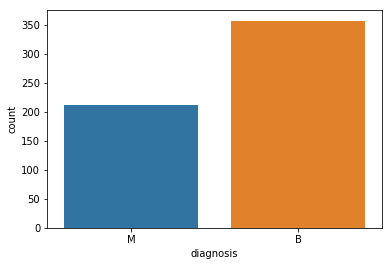

In [10]:
ax = sns.countplot(y, label="Count")
B, M = y.value_counts()
print('Number of Benign: ', B)
print('Number of Malignant: ', M)
plt.show()

In [11]:
x.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean           ...             \
count     569.000000              569.000000           ...              
mean        0.181162                0.062798           ...              
std         0.027414                0.007060           ...              
min         0.106000                0.049960           ...              
25%         0.161900                0.057700           ...              
50%         0.179200                0.061540           ...              
75%         0.195700                0.066120           ...              
max         0.304000                0.097440           ...              

       radius_worst  texture_worst  perimeter_worst   area_worst  \
count    569.000000     569.000000       569.000000   569.000000   
mean      16.269190      25.677223       107.261213   880.583128   
std        4.833242       6.146258        33.602542   569.356993   
min        7.930000      12.020000        50.410000   185.200000   
25%       13.010000      21.080000        84.110000   515.300000   
50%       14.970000      25.410000        97.660000   686.500000   
75%       18.790000      29.720000       125.400000  1084.000000   
max       36.040000      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 30 columns]

Plotting the features in 3 groups each of size 10

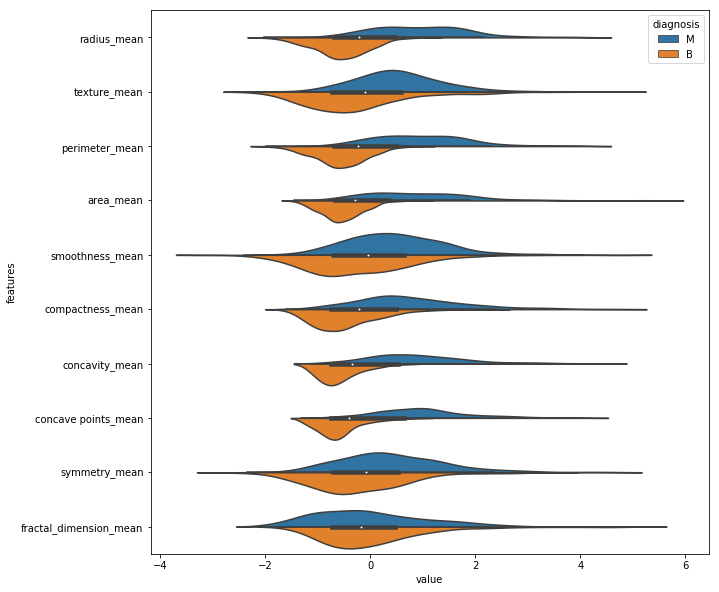

In [12]:
# 1st Group
data_dia = y
data = x
# Standardization
data_n_2 = (data - data.mean()) / data.std()
data = pd.concat([y, data_n_2.iloc[:, 0:10]], axis=1)
data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name="value")
plt.figure(figsize=(10, 10))
sns.violinplot(y="features", x="value", hue="diagnosis", data=data, split=True, inner="box")
plt.xticks(rotation=0)
plt.show()

Violin plots have many of the same summary statistics as box plots:
1. The white dot represents the median
2. The thick gray bar in the center represents the interquartile range
3. The thin gray line represents the 95% confidence interval

From above fig it seen that median of malignant and benign for texture_mean looks like separated so it can be good for classification. However, in fractal_dimension_mean, median doesn't look like separated so it does not give good information about classification.

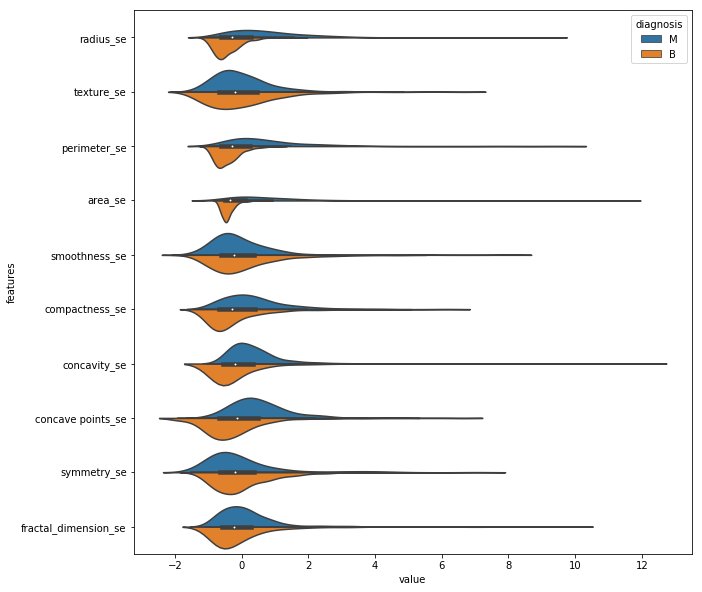

In [13]:
# 2nd Group
data = pd.concat([y, data_n_2.iloc[:,10:20]], axis=1)
data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(y="features", x="value", hue="diagnosis", data=data, split=True, inner="box")
plt.show()

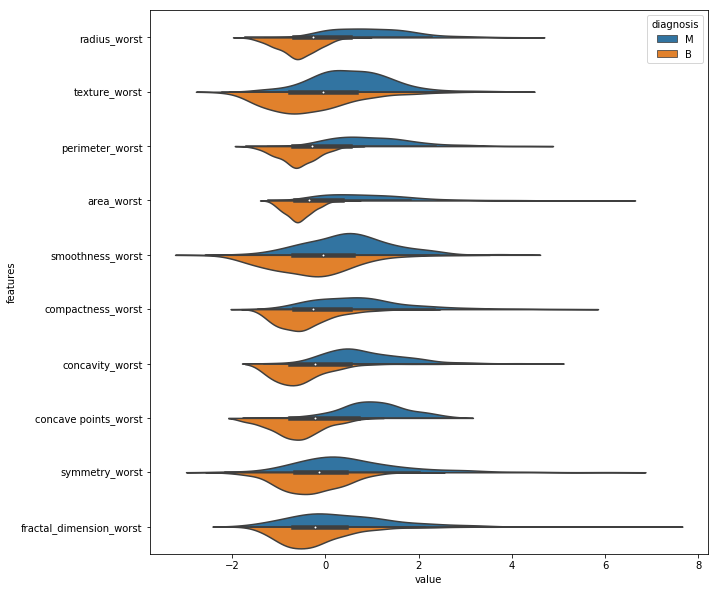

In [14]:
# 3rd Group
data = pd.concat([y, data_n_2.iloc[:,20:]], axis=1)
data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(10, 10))
sns.violinplot(y="features", x="value", hue="diagnosis", data=data, split=True, inner="box")
plt.show()

From above figure it is seen that feature 'concavity_worst' and 'concave points_worst' looks like similar but how can we decide whether they are correlated with each other or not.
Let use joint plot to compare the two feature 

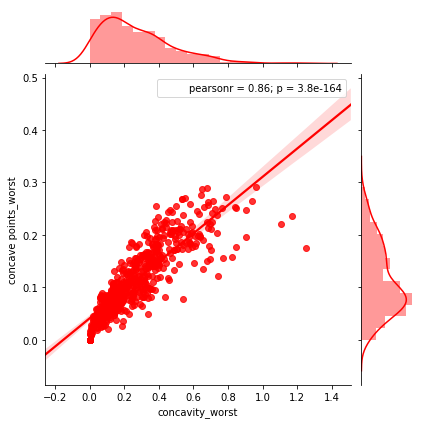

In [15]:
sns.jointplot(x.loc[:,'concavity_worst'], x.loc[:, 'concave points_worst'], kind='regg', color='red')
plt.show()

Using pair grid plot we can compare/correlate three features

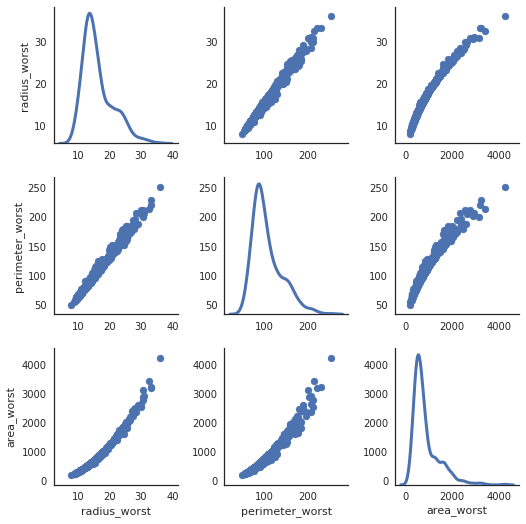

In [16]:
# Comparison for 'radius_worst', 'perimeter_worst', 'area_worst'
sns.set(style='white')
df = x.loc[:, ['radius_worst', 'perimeter_worst', 'area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(plt.scatter)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.show()

Now, lets visualize data with swarm plot, this visualization will show each point, while "stacking" those with similar values:

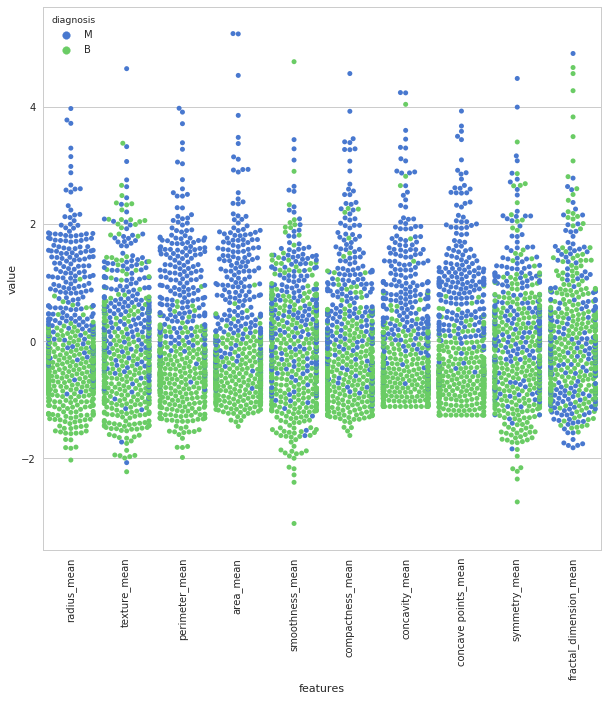

In [17]:
# 1st group
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / data.std()
data = pd.concat([y, data_n_2.iloc[:,0:10]], axis=1)
data = pd.melt(data, id_vars='diagnosis', var_name='features', value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x='features', y='value', hue='diagnosis', data=data)
plt.xticks(rotation=90)
plt.show()

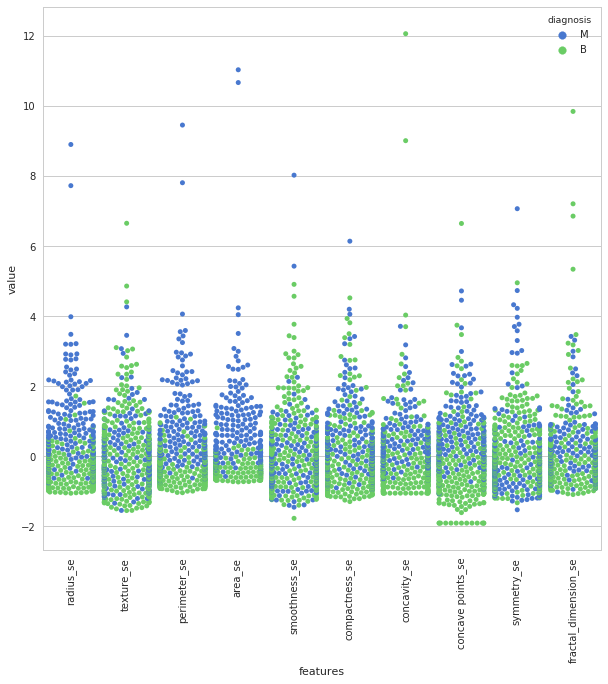

In [18]:
# 2nd group
data = pd.concat([y, data_n_2.iloc[:,10:20]], axis=1)
data = pd.melt(data, id_vars='diagnosis', var_name='features', value_name='value')
plt.figure(figsize=(10,10))
# tic = time.time()
sns.swarmplot(x='features', y='value', hue='diagnosis', data=data)
plt.xticks(rotation=90)
plt.show()

It is seen that in above graph, features such as smoothness_se, symmetry_se are mixed so it is hard to classify while using this feature

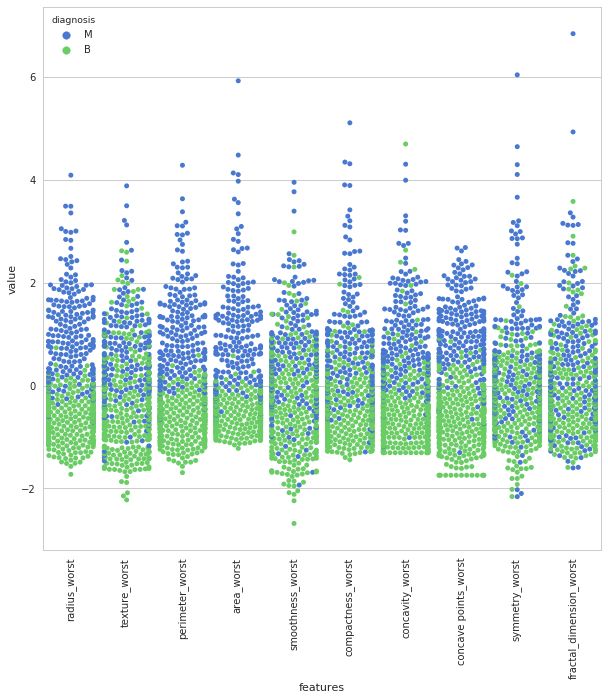

In [19]:
# 3rd group
data = pd.concat([y, data_n_2.iloc[:,20:]], axis=1)
data = pd.melt(data, id_vars='diagnosis', var_name='features', value_name='value')
plt.figure(figsize=(10,10))
# tic = time.time()
sns.swarmplot(x='features', y='value', hue='diagnosis', data=data)
plt.xticks(rotation=90)
plt.show()

Here in above graph it is seen that area_worst, perimeter_worst is well separated by malign and benign.

# To observe all correlation between features, heatmap is used.

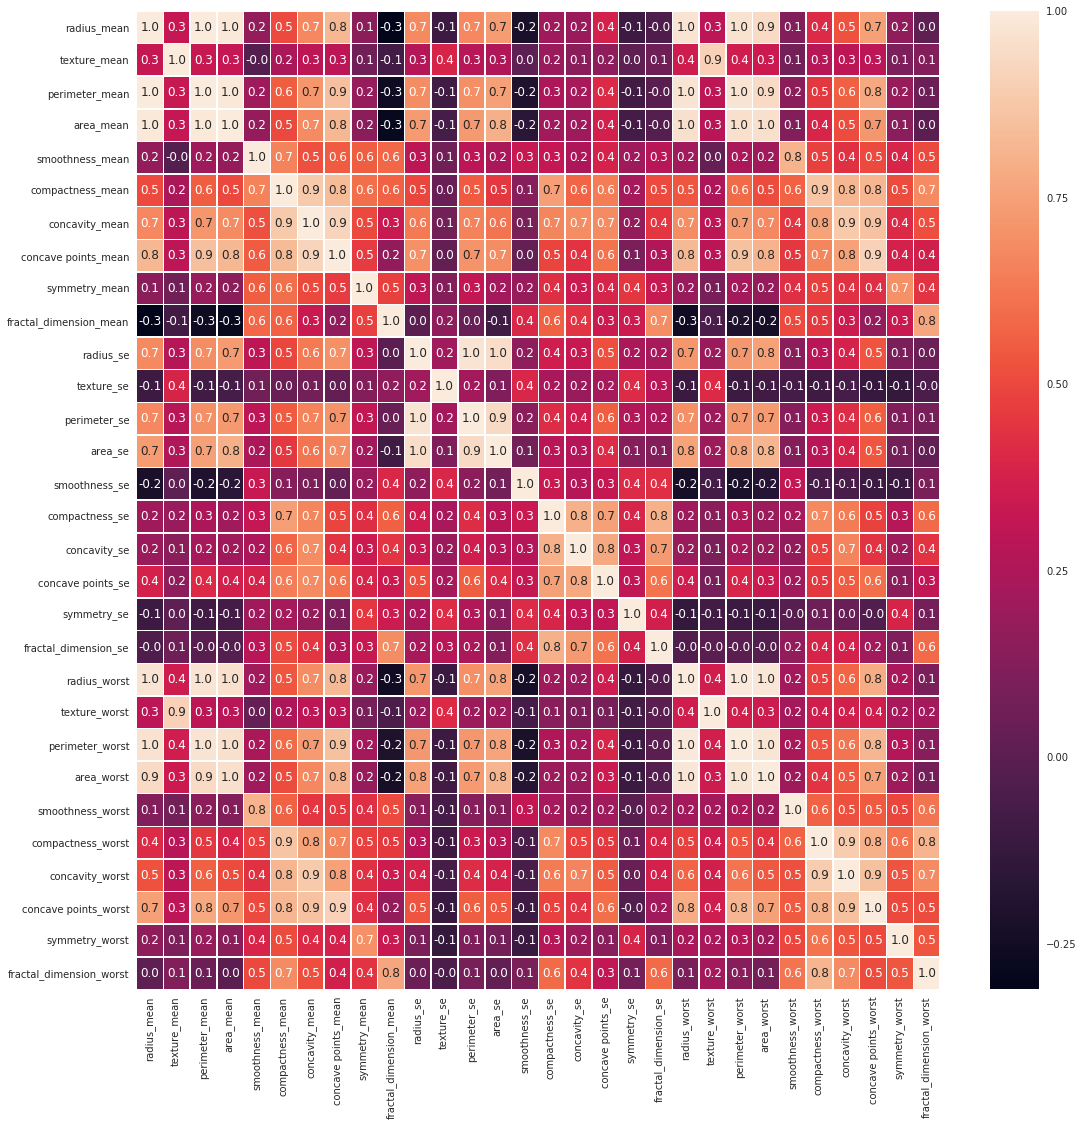

In [20]:
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=0.5, fmt='.1f', ax=ax)
plt.show()

As it can be seen in map heat figure radius_mean, perimeter_mean and area_mean are correlated with each other so we will use only area_mean / radius_mean / perimeter_mean.

In [21]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 ) 
x_1.head()

texture_mean  area_mean  smoothness_mean  concavity_mean  symmetry_mean  \
0         10.38     1001.0          0.11840          0.3001         0.2419   
1         17.77     1326.0          0.08474          0.0869         0.1812   
2         21.25     1203.0          0.10960          0.1974         0.2069   
3         20.38      386.1          0.14250          0.2414         0.2597   
4         14.34     1297.0          0.10030          0.1980         0.1809   

   fractal_dimension_mean  texture_se  area_se  smoothness_se  concavity_se  \
0                 0.07871      0.9053   153.40       0.006399       0.05373   
1                 0.05667      0.7339    74.08       0.005225       0.01860   
2                 0.05999      0.7869    94.03       0.006150       0.03832   
3                 0.09744      1.1560    27.23       0.009110       0.05661   
4                 0.05883      0.7813    94.44       0.011490       0.05688   

   symmetry_se  fractal_dimension_se  smoothness_worst  concavity_worst  \
0      0.03003              0.006193            0.1622           0.7119   
1      0.01389              0.003532            0.1238           0.2416   
2      0.02250              0.004571            0.1444           0.4504   
3      0.05963              0.009208            0.2098           0.6869   
4      0.01756              0.005115            0.1374           0.4000   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678

After drop, heatmap looks like

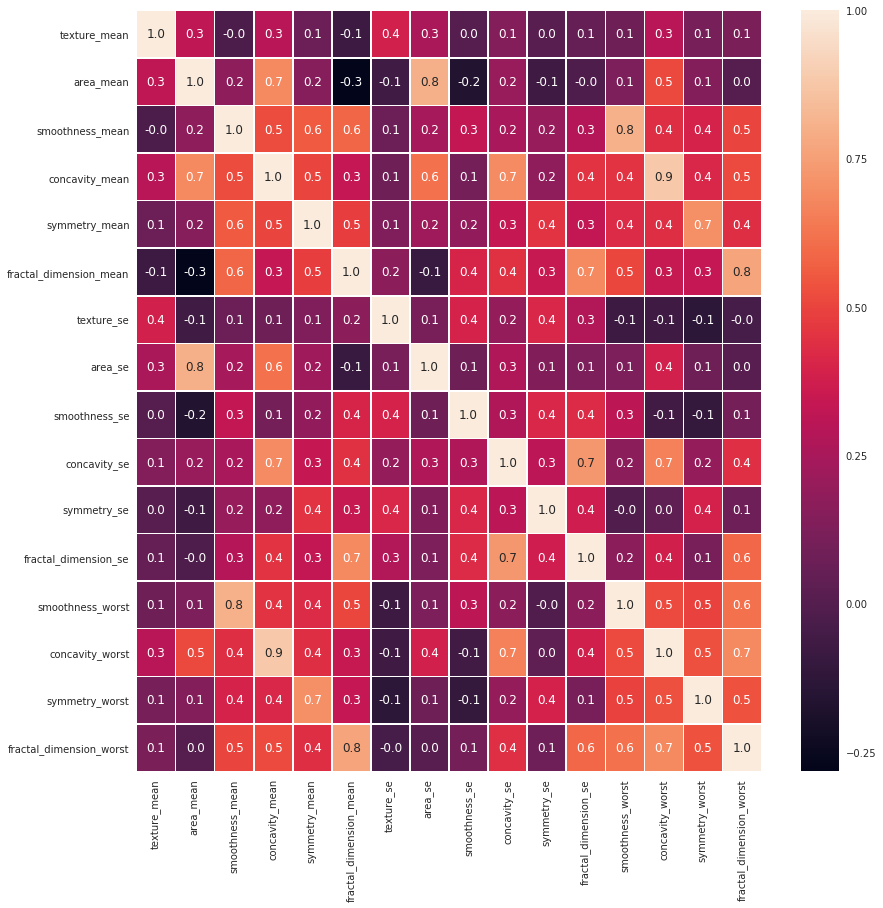

In [22]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

Use Random Forest and check the accuracy

Accuracy:  0.953216374269


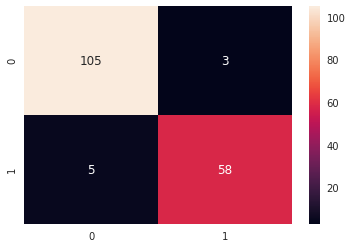

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

# Split data into training (70%) and testing sets (30%)
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(random_state=43)
rf_clf = rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
accuracy = accuracy_score(pred, y_test)
print("Accuracy: ", accuracy)

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.
1. true positives (TP): These are cases in which we predicted yes (they have the disease), and they do have the disease.
2. true negatives (TN): We predicted no, and they don't have the disease.
3. false positives (FP): We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")
4. false negatives (FN): We predicted no, but they actually do have the disease. (Also known as a "Type II error.")

# Univariate Feature Selection
In univariate feature selection, we will use SelectKBest that removes all but the k highest scoring features.

In [40]:
from sklearn.feature_selection import SelectKBest, chi2

select_feature = SelectKBest(chi2, k=15).fit(x_train, y_train) # k = 5, 10, 15,..

print("Score list: ", select_feature.scores_)
print("Feature list: ", x_train.columns)

Score list:  [  6.06916433e+01   3.66899557e+04   1.00015175e-01   1.30547650e+01
   1.95982847e-01   3.42575072e-04   4.07131026e-02   6.12741067e+03
   1.32470372e-03   6.92896719e-01   1.39557806e-03   2.65927071e-03
   2.63226314e-01   2.58858117e+01   1.00635138e+00   1.23087347e-01]
Feature list:  Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Best 5 feature to classify is that __texture_mean, area_mean, area_se, concavity_worst and concavity_mean__. So lets se what happens if we use only these best scored 5 feature.

Accuracy:  0.953216374269


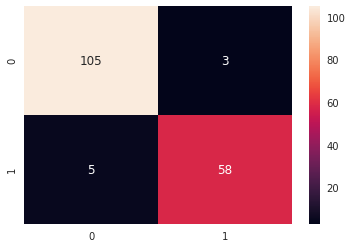

In [41]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)

rf_clf_2 = RandomForestClassifier()
rf_clf_2 = rf_clf_2.fit(x_train_2, y_train)
pred_2 = rf_clf_2.predict(x_test_2)

accuracy_2 = accuracy_score(y_test, pred_2)
print("Accuracy: ", accuracy_2)

cm_2 = confusion_matrix(y_test, pred)
sns.heatmap(cm_2, annot=True, fmt="d")
plt.show()

# Recursive Feature Elimination (RFE) with Random Forest
It assigns weights to each feature and the feature with smallest weights are removed from the current set of features. This procedure is recursively repeated till we get the given number of features.

In [42]:
from sklearn.feature_selection import RFE

rf_clf_3 = RandomForestClassifier()
rfe = RFE(estimator=rf_clf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)

print("Top 5 features are: ", x_train.columns[rfe.support_])

Top 5 features are:  Index(['texture_mean', 'area_mean', 'concavity_mean', 'area_se',
       'concavity_worst'],
      dtype='object')


# Recursive feature elimination with Cross-Validation and RFC
It will not only find best features but also find how many features do we need for best accuracy.

In [43]:
from sklearn.feature_selection import RFECV

rf_clf_4 = RandomForestClassifier()
rfecv = RFECV(estimator=rf_clf_4, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(x_train, y_train)

print("Optimal number of features: ", rfecv.n_features_)
print("Best features: ", x_train.columns[rfecv.support_])

Optimal number of features:  11
Best features:  Index(['texture_mean', 'area_mean', 'concavity_mean', 'fractal_dimension_mean',
       'area_se', 'concavity_se', 'fractal_dimension_se', 'smoothness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


# Feature Ranking

In [47]:
rf_clf_5 = RandomForestClassifier()
rf_clf_5 = rf_clf_5.fit(x_train, y_train)
importances = rf_clf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

Feature Ranking: 
1) feature 1  (0.275261)
2) feature 3  (0.153450)
3) feature 7  (0.135159)
4) feature 13  (0.118466)
5) feature 12  (0.059427)
6) feature 9  (0.051449)
7) feature 14  (0.039819)
8) feature 0  (0.034543)
9) feature 5  (0.023385)
10) feature 15  (0.020159)
11) feature 11  (0.019017)
12) feature 2  (0.017914)
13) feature 6  (0.015507)
14) feature 8  (0.012461)
15) feature 10  (0.012008)
16) feature 4  (0.011975)


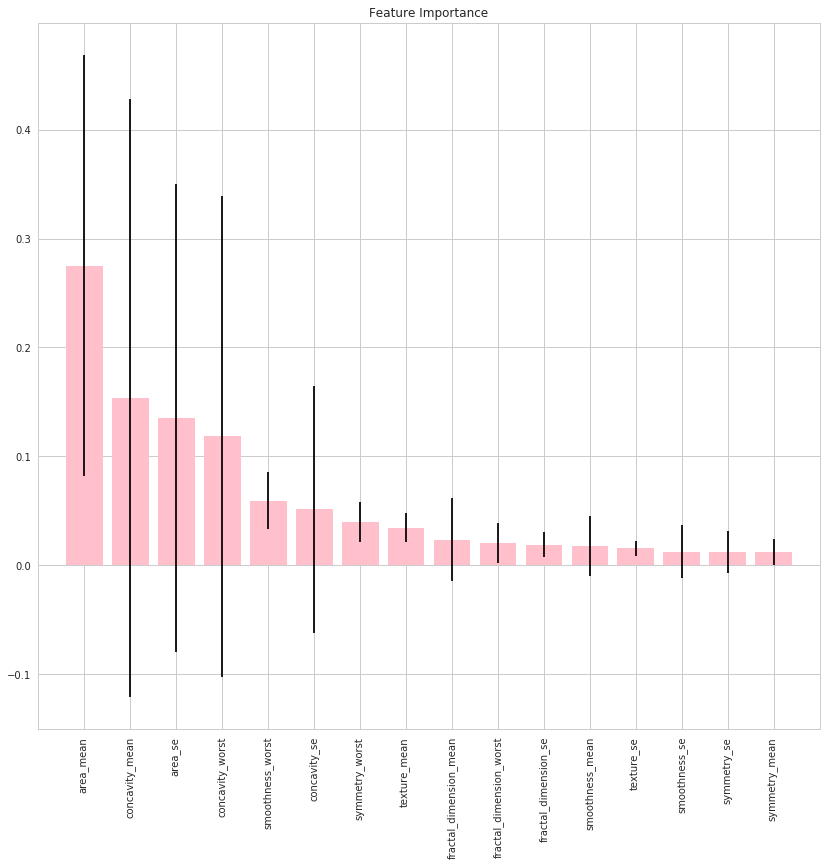

In [49]:
print("Feature Ranking: ")
for  f in range(x_train.shape[1]):
    print('%d) feature %d  (%f)' % (f+1, indices[f], importances[indices[f]]))
    
plt.figure(1, figsize=(14, 13))
plt.title("Feature Importance")
plt.bar(range(x_train.shape[1]), importances[indices], color='pink', yerr=std[indices], align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim(-1, x_train.shape[1])
plt.show()